# Loan Default Prediction
## Step 5: Modelling (KNN)
## Table of Content
11. Imports and Data Loading
12. Test KNN
13. Hyperparameter Tuning
14. Final KNN Model

## 5.7 Imports and Data Loading

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import brier_score_loss, log_loss
from sklearn.metrics import roc_auc_score, RocCurveDisplay

In [3]:
# As before, load training data
df = pd.read_csv('../data/interim/train.csv')
df.head()

,Unnamed: 0,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,5038,6071496,3,2507.210974,8599.977362,47737.07095,6,618,0
1,8929,5006576,0,3879.481181,4894.867489,70287.44380,4,631,0
2,9024,3181518,0,2517.012371,2958.774379,39506.04322,5,763,0
3,3218,3770987,2,6581.765984,9023.147830,84959.97714,8,711,0
4,8550,3481740,5,5243.031680,27422.854140,85183.17609,4,586,1


In [4]:
# Apply the same feature reduction as before to draw comparison
X = df[['income', 'years_employed', 'fico_score']]
y = df['default']

## 5.8 Test KNN

We have loaded the training data into variables X and y. Here we will:
1. perform a train/test split
2. build a first LogReg model using default parameters
3. examine the performance of the model

In [5]:
# Perform train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.1, random_state=23)

class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

In [6]:
# Train a first model using default parameters
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
fit_model = model.fit(X_train, y_train)

In [7]:
# Use this model to predict on the test set
y_pred = fit_model.predict(X_test)
y_proba = fit_model.predict_proba(X_test)[:,1]

               precision    recall  f1-score   support

0(no default)       0.83      0.96      0.89       653
   1(default)       0.39      0.12      0.18       147

     accuracy                           0.80       800
    macro avg       0.61      0.54      0.53       800
 weighted avg       0.75      0.80      0.76       800

Brier score loss: 	0.16185000000000002
log loss: 		2.343419837488838
ROC_AUC score:  0.6038743215509788


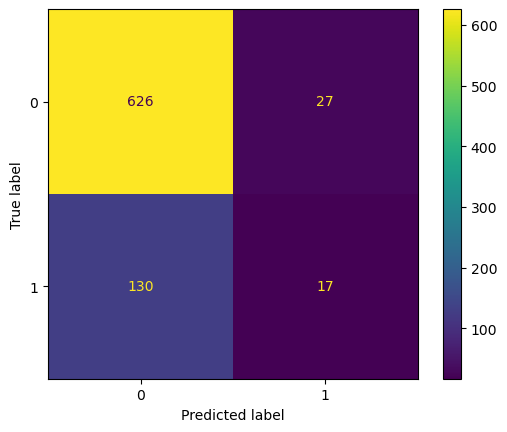

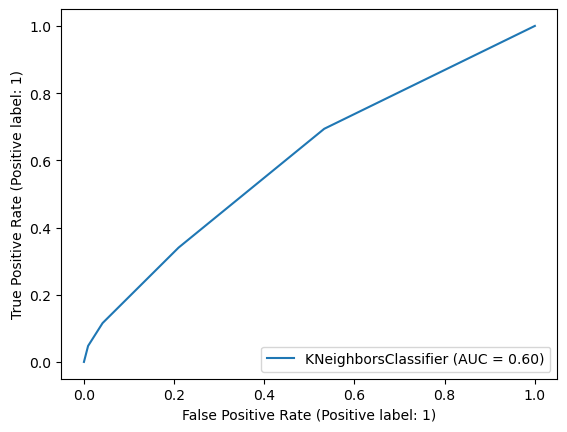

In [8]:
# Take a look at performance metrics
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

target_names = ['0(no default)', '1(default)']
print(classification_report(y_test, y_pred, target_names=target_names))

print('Brier score loss: \t' + str(brier_score_loss(y_test, y_proba)))
print('log loss: \t\t' + str(log_loss(y_test, y_proba)))

print('ROC_AUC score: ', str(roc_auc_score(y_test, y_proba)))
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

## 5.9 Hyperparameter Tuning
As we can see already, the default LogReg model is performing worse than the default CatBoost model. It will be worthwhile to see if some hyperparameter tuning would improve the performance and by how much.

Here are the default hyperparameters:
penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None

In [9]:
# Suppress convergence warnings
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

from sklearn.model_selection import RandomizedSearchCV

clf = LogisticRegression(max_iter=500, penalty='l2')

param_distributions = {'solver': ['lbfgs', 'newton-cholesky'],
                       'C': [0.1, 0.5, 0.75, 1, 5, 10]}

search = RandomizedSearchCV(clf, param_distributions, scoring='roc_auc').fit(X_train, y_train)
print('search done')
print(search.best_params_)

NameError: name 'LogisticRegression' is not defined

## 5.6 Final LogReg Model
Using the results of the last section, the best values for the test parameters are:
solver = 'newton-cholesky' (default 'lbfgs')
C = 0.75 (default 1)
Using these parameters, we will train the model and calculate metrics on the validation set.

In [ ]:
# Import validation data
df_valid = pd.read_csv('../data/interim/validation.csv')
X_valid = df_valid[['income', 'years_employed', 'fico_score']]
y_valid = df_valid['default']

In [ ]:
# Let us examine the performance using this set of hyperparameters
model = LogisticRegression(solver='newton-cholesky', penalty='l2', C=0.75, max_iter=500)
fit_model = model.fit(X, y)

In [ ]:
# Use the trained model to make predictions
y_pred = fit_model.predict(X_valid)
y_proba = fit_model.predict_proba(X_valid)[:,1]

In [ ]:
# Generate performance metrics from the predictions
cm = confusion_matrix(y_valid, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

target_names = ['0(no default)', '1(default)']
print(classification_report(y_valid, y_pred, target_names=target_names))

print('Brier score loss: \t' + str(brier_score_loss(y_valid, y_proba)))
print('log loss: \t\t' + str(log_loss(y_valid, y_proba)))

print('ROC_AUC score: ', str(roc_auc_score(y_valid, y_proba)))
RocCurveDisplay.from_estimator(model, X_valid, y_valid)
plt.show()